# **Basic Set up**

In [1]:
!pip install scikit-plot

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [8]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import scikitplot as skplt
import keras
import numpy as np

In [9]:
#load the models first

yaml_file = open('seq2seq/seq2seq_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
seq2seq = keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
seq2seq.load_weights("seq2seq/seq2seq_model.h5")
print("Loaded model from disk")


with open("seq2seq/seq2seq_trainHistoryDict.pkl",'rb') as f:
  seq2seq_history = pickle.load(f)
print(seq2seq_history)

Loaded model from disk
{'loss': [3.343304395675659, 1.7541414499282837, 1.6625837087631226, 1.5687263011932373, 1.4621211290359497, 1.3743009567260742, 1.3142828941345215, 1.2703580856323242, 1.2347946166992188, 1.2059407234191895, 1.1811121702194214, 1.1597213745117188, 1.1399015188217163, 1.1207947731018066, 1.1013365983963013, 1.0836673974990845, 1.0679789781570435, 1.053489327430725, 1.044083833694458, 1.0270169973373413, 1.015116572380066, 1.0024157762527466, 0.9893627762794495, 0.9765781164169312, 0.9647412300109863], 'accuracy': [0.6347014904022217, 0.651537299156189, 0.6516218185424805, 0.6638107299804688, 0.6904532313346863, 0.7125677466392517, 0.7227030396461487, 0.7283770442008972, 0.7354419231414795, 0.7402490377426147, 0.7463836669921875, 0.7510402202606201, 0.753860354423523, 0.7563306093215942, 0.7587279677391052, 0.7616299390792847, 0.763972282409668, 0.7661001682281494, 0.7670310735702515, 0.7704755067825317, 0.7724452018737793, 0.7745895385742188, 0.7766754627227783, 

In [3]:
#load the models first

bin_yaml_file = open('binary/binary_model.yaml', 'r')
bin_loaded_model_yaml = bin_yaml_file.read()
bin_yaml_file.close()
binary = keras.models.model_from_yaml(bin_loaded_model_yaml)
# load weights into new model
binary.load_weights("binary/binary_model.h5")
print("Loaded model from disk")

with open("binary/binary_trainHistoryDict.pkl",'rb') as f:
  binary_history = pickle.load(f)
print(binary_history)

Loaded model from disk
{'loss': [0.696229875087738, 0.6935150623321533, 0.6934667825698853, 0.6932790279388428, 0.6933234333992004, 0.6933431625366211, 0.6930941939353943, 0.6931597590446472, 0.6932087540626526, 0.6932559609413147, 0.6931759715080261, 0.6931840181350708, 0.6931411027908325, 0.6932119727134705, 0.6932224631309509, 0.6931712627410889, 0.6931525468826294, 0.6932105422019958, 0.6931936144828796, 0.6931850910186768, 0.6931405067443848, 0.6931448578834534, 0.6931478381156921, 0.6931173801422119, 0.6931554079055786], 'accuracy': [0.4997519254684448, 0.505297839641571, 0.5033842325210571, 0.5042347311973572, 0.5036323070526123, 0.5042524337768555, 0.5044296383857727, 0.5044296383857727, 0.5050320625305176, 0.5042170286178589, 0.5047662854194641, 0.5047839879989624, 0.5045536756515503, 0.5052092671394348, 0.503596842288971, 0.5048726201057434, 0.5052624344825745, 0.5051738023757935, 0.5046422481536865, 0.504837155342102, 0.5051915645599365, 0.50490802526474, 0.5054218769073486,

In [10]:
with open("y_pred.pkl",'rb') as pred:
  y_pred = pickle.load(pred)

with open("y_true.pkl",'rb') as true:
  y_true = pickle.load(true)

print(len(y_true))
print(len(y_pred))

1000
1000


In [11]:
EPOCHS = 25

# **Seq2Seq Plots**

1. Loss Plot
2. Acc Plot
3. Test Acc,Loss (already in the terminal output)

Text(0.5, 1.0, 'Loss for Seq2Seq')

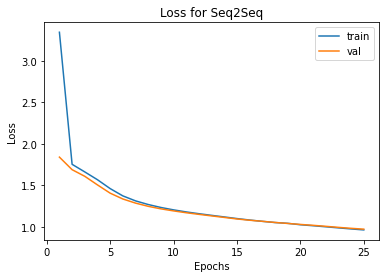

In [12]:
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Seq2Seq")

Text(0.5, 1.0, 'Accuracy for Seq2Seq')

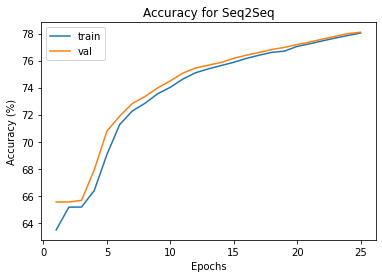

In [13]:
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['accuracy'])*100.00,label='train')
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['val_accuracy']) * 100.0,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Seq2Seq")

# **Binary Model Plots**

1. Loss Plot
2. Acc Plot
3. ROC Plot
4. PR plot
5. F1 score report

In [14]:
from collections import Counter
print(dict(Counter(y_true)))

{0: 485, 1: 515}


In [13]:
y_pred

array([[0.50611484],
       [0.50611484],
       [0.50638443],
       [0.50611484],
       [0.5070776 ],
       [0.5062936 ],
       [0.50611484],
       [0.5072438 ],
       [0.5171556 ],
       [0.50611484],
       [0.50657326],
       [0.50670445],
       [0.5063904 ],
       [0.5090006 ],
       [0.50611484],
       [0.5325671 ],
       [0.51145536],
       [0.5106708 ],
       [0.5072745 ],
       [0.50846756],
       [0.6727807 ],
       [0.50632167],
       [0.50611484],
       [0.50722945],
       [0.50611484],
       [0.50611484],
       [0.50724334],
       [0.50611484],
       [0.5064535 ],
       [0.50758386],
       [0.5070535 ],
       [0.50611484],
       [0.50603676],
       [0.5073512 ],
       [0.50611484],
       [0.5071695 ],
       [0.5064778 ],
       [0.5073115 ],
       [0.50906813],
       [0.5064247 ],
       [0.50645334],
       [0.50704193],
       [0.50611484],
       [0.5064706 ],
       [0.50611484],
       [0.50611484],
       [0.5064023 ],
       [0.506

Text(0.5, 1.0, 'Loss for Binary Classifier')

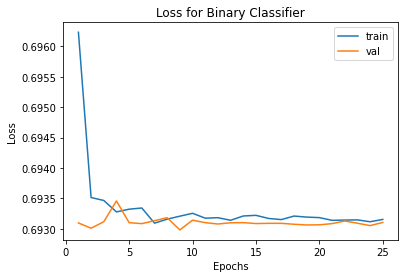

In [15]:
plt.plot(list(range(1,EPOCHS+1)), binary_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),binary_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Binary Classifier")

Text(0.5, 1.0, 'Accuracy for Binary Classifier')

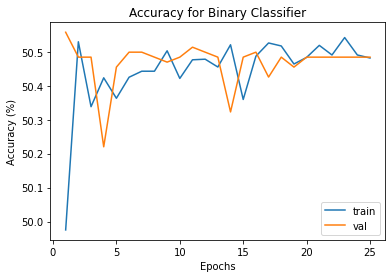

In [16]:
plt.plot(list(range(1,EPOCHS+1)), np.array(binary_history['accuracy'])*100.00,label='train')
plt.plot(list(range(1,EPOCHS+1)),np.array(binary_history['val_accuracy'])*100.00,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Binary Classifier")

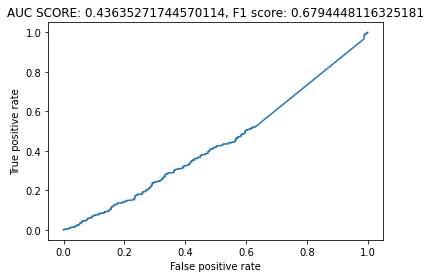

In [17]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_roc = roc_auc_score(y_true,y_pred) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(fpr, tpr)
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

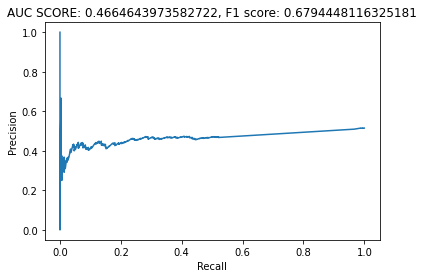

In [18]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_roc = auc(recall,precision) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.show()

<Figure size 432x288 with 0 Axes>

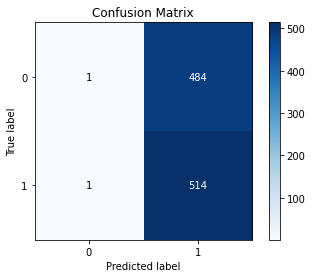

In [19]:
y_pred_f1 = y_pred > 0.5 #Basic threshold
plt.figure()
skplt.metrics.plot_confusion_matrix(y_true,y_pred_f1)
plt.show()